# Day 20

## (Kaggle) 房價預測

## [作業目標]
- 試著模仿範例寫法, 在房價預測中, 觀察去除離群值的影響

## [作業重點]
- 觀察將極端值以上下限值取代, 對於分布與迴歸分數的影響 (In[5], Out[5])
- 觀察將極端值資料直接刪除, 對於分布與迴歸分數的影響 (In[6], Out[6])

## [參考資料]

**離群值! 離群值? 離群值! Python 知乎-連玉君stata: https://zhuanlan.zhihu.com/p/33468998**

- 本文除了談到離群值的定義外，主要在第3部分: 離群值處理方法，不僅僅告訴你有哪幾類方式，並以圖示的方式呈現讓同學能以常識推論分析，其中對數轉換的部分，我們會在明天的內容有更多的講解，同學大致了解方向即可。

In [1]:
# 做完特徵工程前的所有準備 (與前範例相同)
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import time

data_path = 'data/'
df_train = pd.read_csv(data_path + 'house_train.csv.gz')

train_Y = np.log1p(df_train['SalePrice'])
df = df_train.drop(['Id', 'SalePrice'] , axis=1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [2]:
#只取 int64, float64 兩種數值型欄位, 存於 num_features 中
num_features = []
for dtype, feature in zip(df.dtypes, df.columns):
    if dtype == 'float64' or dtype == 'int64':
        num_features.append(feature)
print(f'{len(num_features)} Numeric Features : {num_features}\n')

36 Numeric Features : ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']



In [3]:
# 削減文字型欄位, 只剩數值型欄位
df = df[num_features]
df = df.fillna(-1).astype(float)
MMEncoder = MinMaxScaler()
train_num = train_Y.shape[0]
print(df['1stFlrSF'].sort_values(ascending=False).head())
print(df['1stFlrSF'].sort_values(ascending=False).tail())

1298    4692.0
496     3228.0
523     3138.0
1024    2898.0
1373    2633.0
Name: 1stFlrSF, dtype: float64
430     483.0
916     480.0
1100    438.0
705     372.0
533     334.0
Name: 1stFlrSF, dtype: float64


## 作業1
**試著限制 '1樓地板面積(平方英尺)' (1stFlrSF) 欄位的上下限, 看看能否再進一步提高分數?**

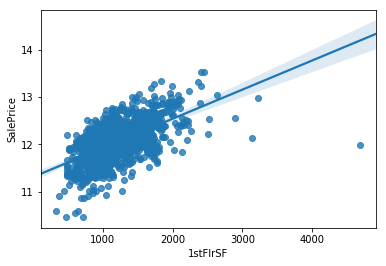

Score : 0.8466512794350443
Time : 18.003463745117188 ms


In [4]:
# 顯示 1stFlrSF 與目標值的散佈圖
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.regplot(x = df['1stFlrSF'], y=train_Y)
plt.show()

# 做線性迴歸, 觀察分數
train_X = MMEncoder.fit_transform(df)
estimator = LinearRegression()
start = time.time()
print(f'Score : {cross_val_score(estimator, train_X, train_Y, cv=5).mean()}')
print(f'Time : {(time.time() - start) * 1000} ms')

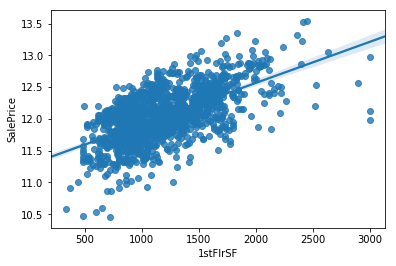

Score : 0.8232871343120143
Time : 16.00170135498047 ms


In [5]:
# 將 1stFlrSF 限制在你覺得適合的範圍內, 調整離群值
df['1stFlrSF'] = df['1stFlrSF'].clip(200, 3000)
sns.regplot(x = df['1stFlrSF'], y = train_Y)
plt.show()

# 做線性迴歸, 觀察分數
train_X = MMEncoder.fit_transform(df)
estimator = LinearRegression()
start = time.time()
print(f'Score : {cross_val_score(estimator, train_X, train_Y, cv=5).mean()}')
print(f'Time : {(time.time() - start) * 1000} ms')

## 作業2
**續前題, 去除離群值有兩類方式 :  捨棄離群值(刪除離群的資料) 以及調整離群值, 試著用同樣的上下限, 改為 '捨棄離群值' 的方法, 看看結果會變好還是變差? 並試著解釋原因。**

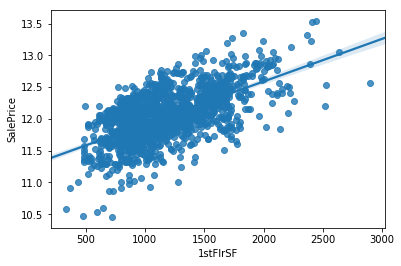

Score : 0.8944647281657776
Time : 19.000530242919922 ms


In [6]:
# 將 1stFlrSF 限制在你覺得適合的範圍內, 捨棄離群值
keep_value = (df['1stFlrSF']>200) & (df['1stFlrSF']<3000)
df = df[keep_value]
train_Y = train_Y[keep_value]
sns.regplot(x = df['1stFlrSF'], y=train_Y)
plt.show()

# 做線性迴歸, 觀察分數
train_X = MMEncoder.fit_transform(df)
estimator = LinearRegression()
start = time.time()
print(f'Score : {cross_val_score(estimator, train_X, train_Y, cv=5).mean()}')
print(f'Time : {(time.time() - start) * 1000} ms')

**It only change '1stFlrSF' column without changing related column data, which may distort the reliability. That's why drop the peak value might be more accurate than clip dataset.**